In [83]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/Social_Network_Ads.csv


In [84]:
import numpy as np
import pandas as pd

In [85]:
import os
os.listdir("/kaggle/input/dataset")


['Social_Network_Ads.csv']

In [86]:
df = pd.read_csv("/kaggle/input/dataset/Social_Network_Ads.csv")

In [87]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [88]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [89]:
import matplotlib.pyplot as plt

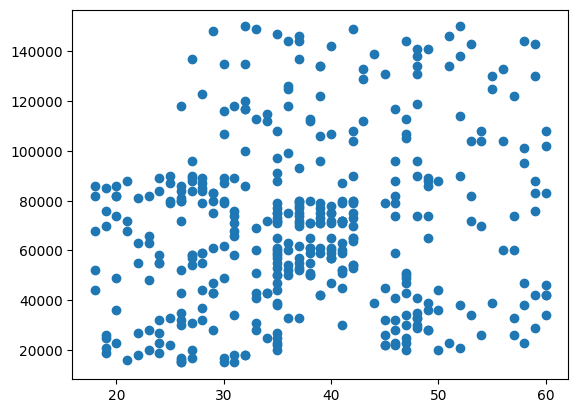

In [90]:
plt.scatter(x = df.iloc[:,0],y= df.iloc[:,1] )

In [91]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [92]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [94]:
import torch
import torch.nn as nn
import torch.optim as optim

In [95]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (320, 2)
X_test shape: (80, 2)
y_train shape: (320,)
y_test shape: (80,)


In [96]:
# Convert DataFrame to NumPy array using to_numpy()
X_train_array = X_train.to_numpy()
y_train_array = y_train.to_numpy()
X_test_array = X_test.to_numpy()
y_test_array = y_test.to_numpy()

In [97]:
X_train = torch.tensor(X_train_array, dtype=torch.float32)
y_train = torch.tensor(y_train_array, dtype=torch.float32).unsqueeze(dim=1)
X_test = torch.tensor(X_test_array, dtype=torch.float32)
y_test = torch.tensor(y_test_array, dtype=torch.float32).unsqueeze(dim=1)

In [98]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: torch.Size([320, 2])
X_test shape: torch.Size([80, 2])
y_train shape: torch.Size([320, 1])
y_test shape: torch.Size([80, 1])


In [99]:
class DataScaling(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(X_train.shape[1],32)
        self.l2 = nn.Linear(32,16)
        self.l3 = nn.Linear(16,1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self,x):
        x = self.relu(self.l1(x))
        x = self.relu(self.l2(x))
        x = self.sigmoid(self.l3(x))
        
        return x
    
model = DataScaling()

In [100]:
model

DataScaling(
  (l1): Linear(in_features=2, out_features=32, bias=True)
  (l2): Linear(in_features=32, out_features=16, bias=True)
  (l3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

In [101]:
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)

In [102]:
epochs = 100
for i in range(epochs):
    #Training phase
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    #Testing phase
    model.eval()
    with torch.no_grad():
        y_test_pred = model(X_test)
        test_loss = loss_fn(y_test_pred, y_test)
        
    print(f"Epoch [{i+1}/{epochs}], Train loss: {loss.item():.4f}, Test_loss: {test_loss.item():.4f}")

Epoch [1/100], Train loss: 34.6875, Test_loss: 40.0000
Epoch [2/100], Train loss: 34.6875, Test_loss: 40.0000
Epoch [3/100], Train loss: 34.6875, Test_loss: 40.0000
Epoch [4/100], Train loss: 34.6875, Test_loss: 40.0000
Epoch [5/100], Train loss: 34.6875, Test_loss: 40.0000
Epoch [6/100], Train loss: 34.6875, Test_loss: 40.0000
Epoch [7/100], Train loss: 34.6875, Test_loss: 40.0000
Epoch [8/100], Train loss: 34.6875, Test_loss: 40.0000
Epoch [9/100], Train loss: 34.6875, Test_loss: 40.0000
Epoch [10/100], Train loss: 34.6875, Test_loss: 40.0000
Epoch [11/100], Train loss: 34.6875, Test_loss: 40.0000
Epoch [12/100], Train loss: 34.6875, Test_loss: 40.0000
Epoch [13/100], Train loss: 34.6875, Test_loss: 40.0000
Epoch [14/100], Train loss: 34.6875, Test_loss: 40.0000
Epoch [15/100], Train loss: 34.6875, Test_loss: 40.0000
Epoch [16/100], Train loss: 34.6875, Test_loss: 40.0000
Epoch [17/100], Train loss: 34.6875, Test_loss: 40.0000
Epoch [18/100], Train loss: 34.6875, Test_loss: 40.0000
E

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [104]:
X_train = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test = torch.tensor(X_test_scaled, dtype=torch.float32)

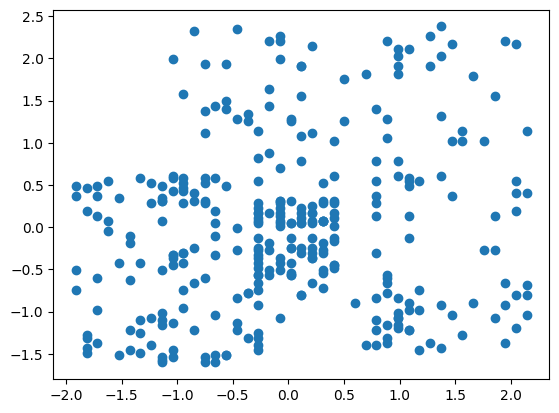

In [105]:
plt.scatter(x = X_train[:,0],y= X_train[:,1] )

In [106]:
model2 = DataScaling()

In [107]:
optimizer = optim.Adam(model2.parameters(),lr=0.01)

In [108]:
epochs = 100
for i in range(epochs):
    #Training phase
    model2.train()
    y_pred = model2(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    #Testing phase
    model2.eval()
    with torch.no_grad():
        y_test_pred = model2(X_test)
        test_loss = loss_fn(y_test_pred, y_test)
        
    print(f"Epoch [{i+1}/{epochs}], Train loss: {loss.item():.4f}, Test_loss: {test_loss.item():.4f}")

Epoch [1/100], Train loss: 0.7342, Test_loss: 0.6964
Epoch [2/100], Train loss: 0.6966, Test_loss: 0.6588
Epoch [3/100], Train loss: 0.6620, Test_loss: 0.6226
Epoch [4/100], Train loss: 0.6280, Test_loss: 0.5890
Epoch [5/100], Train loss: 0.5949, Test_loss: 0.5554
Epoch [6/100], Train loss: 0.5612, Test_loss: 0.5208
Epoch [7/100], Train loss: 0.5261, Test_loss: 0.4868
Epoch [8/100], Train loss: 0.4910, Test_loss: 0.4554
Epoch [9/100], Train loss: 0.4575, Test_loss: 0.4268
Epoch [10/100], Train loss: 0.4265, Test_loss: 0.4009
Epoch [11/100], Train loss: 0.3982, Test_loss: 0.3782
Epoch [12/100], Train loss: 0.3728, Test_loss: 0.3585
Epoch [13/100], Train loss: 0.3503, Test_loss: 0.3419
Epoch [14/100], Train loss: 0.3309, Test_loss: 0.3279
Epoch [15/100], Train loss: 0.3146, Test_loss: 0.3161
Epoch [16/100], Train loss: 0.3012, Test_loss: 0.3064
Epoch [17/100], Train loss: 0.2903, Test_loss: 0.2988
Epoch [18/100], Train loss: 0.2819, Test_loss: 0.2932
Epoch [19/100], Train loss: 0.2754, T